In [ ]:
%matplotlib inline

# Auswahl der Anzahl von Clustern mit Silhouettenanalyse


Die Silhouettenanalyse kann verwendet werden, um den Trennungsabstand zwischen den
resultierenden Clustern zu untersuchen. 

Dieses Maß hat einen Bereich von [-1, 1].

Silhouettenkoeffizienten nahe +1 zeigen, dass das Sample weit von den benachbarten Clustern entfernt ist.
Ein Wert von 0 zeigt an, dass sich die Stichprobe auf oder sehr nahe an der Entscheidungsgrenze zwischen
zwei benachbarten Clustern befindet. Negative Werte weisen darauf hin, dass diese Stichproben dem falschen 
Cluster zugeordnet wurden.

Das daraus resultierende Silhouettendiagramm gibt einen Anhaltspunkt dafür, wie gut die Clustertrennung ist
und bietet somit eine Möglichkeit, Parameter wie die Anzahl von Clustern visuell zu bewerten. 

In diesem Beispiel wird die Silhouettenanalyse verwendet, um einen optimalen Wert für unseren Hyperparameter
``n_Cluster`` zu bestimmen. 

Die üblichen Imports:

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Importieren wir noch einen hübschen Plotter:

In [2]:
from SilhouettePlot import PlotSilhouette

Wir generieren uns Beispieldaten:

In [3]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility


Wir schauen uns zunächst mal die "Ground truth" als Scatterplot an:

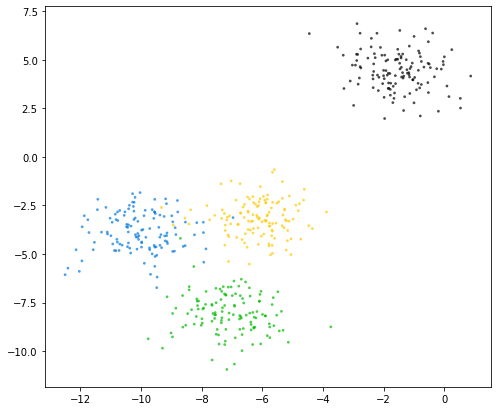

In [4]:
fig, ax = plt.subplots(1, figsize=(8,7))
colors = cm.nipy_spectral(y.astype(float) / 4)
ax.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k');

Wir sehen eine gewisse Durchdringung der Cluster im unteren linken Viertel:

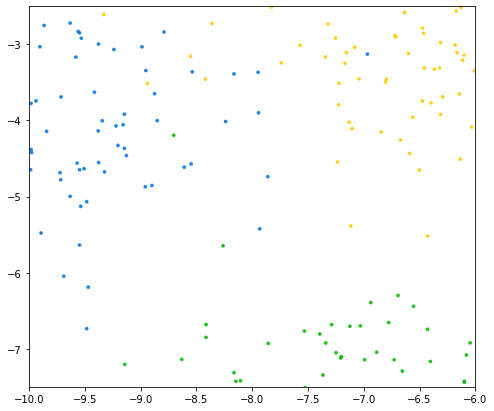

In [5]:
ax.scatter(X[:, 0], X[:, 1], marker='.', s=60, lw=0, alpha=0.7,
           c=colors, edgecolor='k')
ax.set_xlim([-10, -6])
ax.set_ylim([-7.5, -2.5])
fig

Jetzt zu unserer Silhouetten Analyse:

Bei n_clusters = 2 ist der Silhouette Score: 0.7049787496083262
Bei n_clusters = 3 ist der Silhouette Score: 0.5882004012129721
Bei n_clusters = 4 ist der Silhouette Score: 0.6505186632729437
Bei n_clusters = 5 ist der Silhouette Score: 0.56376469026194
Bei n_clusters = 6 ist der Silhouette Score: 0.4504666294372765


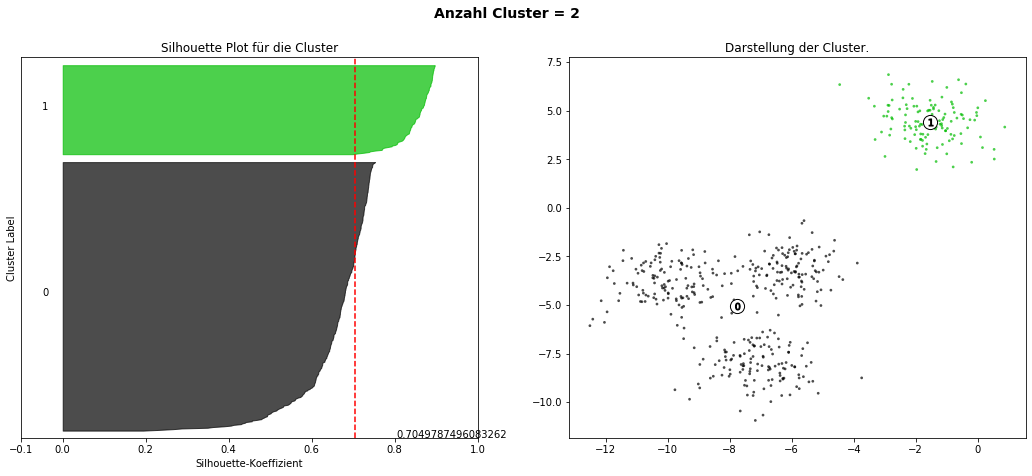

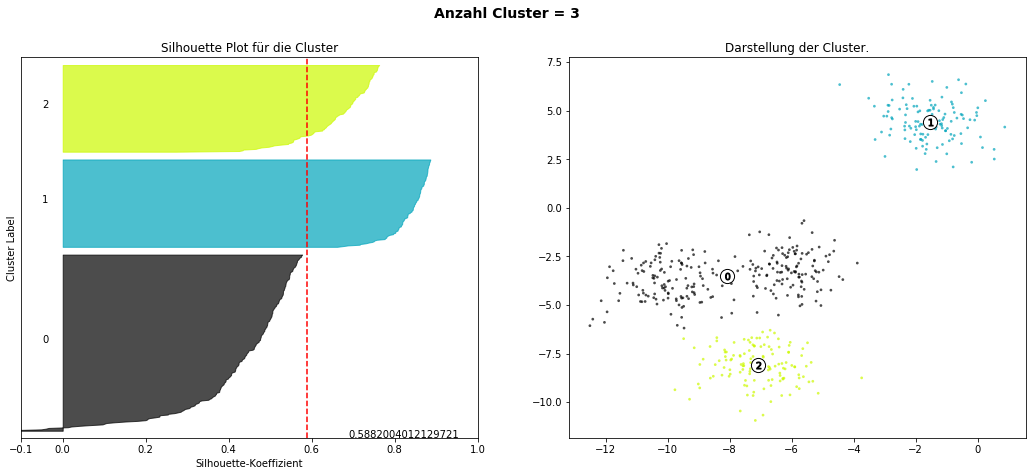

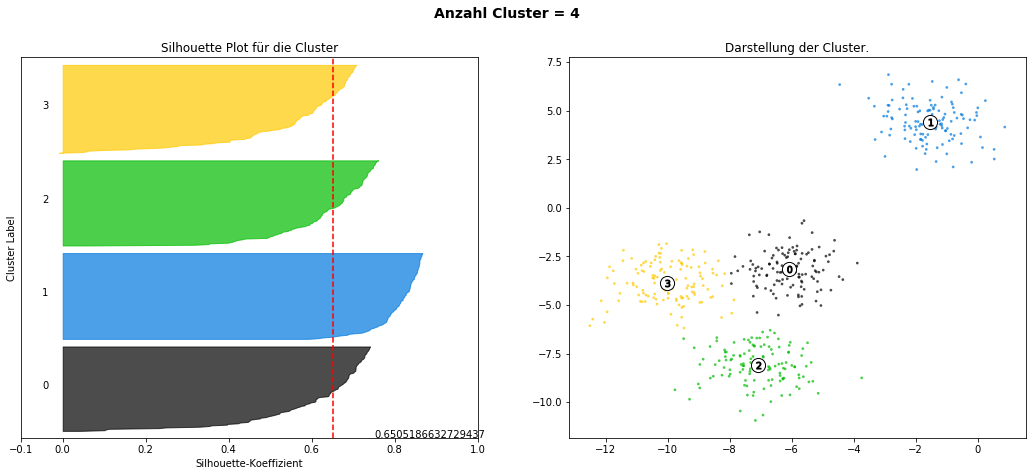

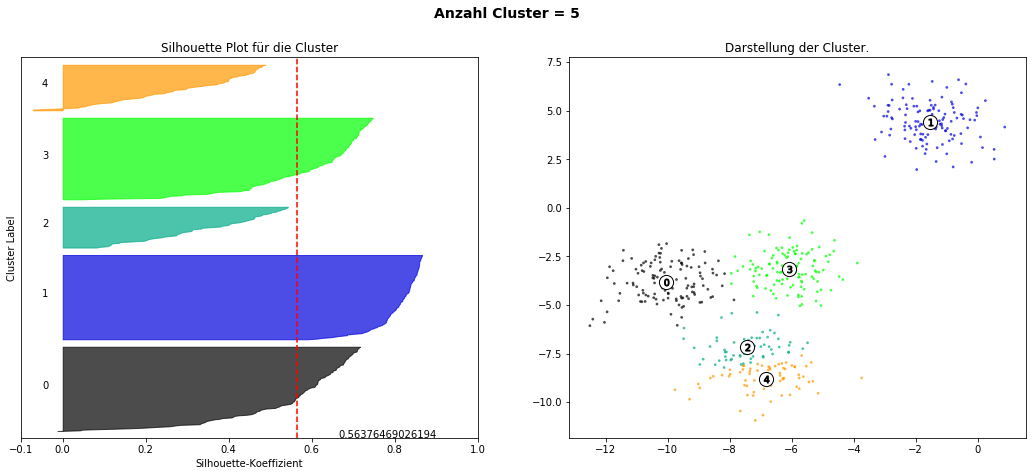

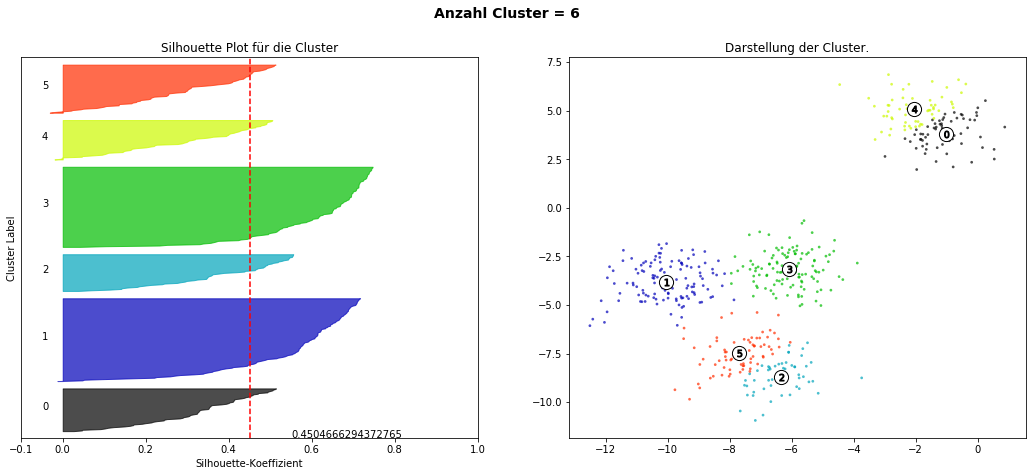

In [6]:


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    PlotSilhouette(X, clusterer, n_clusters)

plt.show()

Die Silhouettengrafik zeigt, dass die ``n_cluster`` Werte von 3, 5
und 6 schlechte Wahlen für die gegebenen Daten sind, aufgrund des Vorhandenseins von Clustern mit
unterdurchschnittlichen Silhouettenwerten und auch durch große Schwankungen in der Größe
der Silhouettenparzellen. Die Silhouettenanalyse ist wenig aussagekräftig bei der Entscheidung
zwischen 2 und 4.

Auch aus der Dicke des Silhouettenplotts kann die Clustergröße visualisiert werden. 
Der Silhouettenplot für den Cluster 0, bei ``n_cluster == 2`` , ist größer aufgrund der Gruppierung der 
3 Untercluster zu einem großen Cluster. Bei ``n_cluster == 4`` jedoch, sind alle Darstellungen mehr
oder weniger von ähnlicher Dicke und daher von ähnlicher Größe.